In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def myEdgeFilter(img0, sigma):
    # Define threshold
    thr=150
    # Apply GaussianBlur to image
    h_size=int(2*np.ceil(3*sigma)+1)
    blur = cv2.GaussianBlur(img0,(h_size,h_size),sigma)
    # Define sobel derivatives filters
    x_sobel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    y_sobel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    
    img1=np.zeros_like(img0)
    img2=np.zeros_like(img1)
    img3=np.zeros_like(img1)
    img4=np.zeros_like(img1)
    img5=np.zeros_like(img1)
    
    w , t = np.shape(x_sobel)[0] , np.shape(x_sobel)[1]
    
    # Apply x derivative filter
    for i in range(np.shape(img1)[0]-(w-1)):
         for j in range(np.shape(img1)[1]-(t-1)):
            img1[i,j]=np.sum(x_sobel*img0[i:i+w,j:j+t])
    # Apply y derivative filter
    for i in range(np.shape(img1)[0]-(w-1)):
         for j in range(np.shape(img1)[1]-(t-1)):
            img2[i,j]=np.sum(y_sobel*img0[i:i+w,j:j+t])
    # Calculate magnitude of gradient
    for i in range(np.shape(img1)[0]):
         for j in range(np.shape(img1)[1]): 
            img3[i,j]=img1[i,j]**2+img2[i,j]**2    
    # Apply threshold
    for i in range(np.shape(img1)[0]):
         for j in range(np.shape(img1)[1]):
               if img3[i,j]>thr:
                    img4[i,j]=img3[i,j]
                    #img4[i,j]=255
               else:
                    img4[i,j]=0
    
    # Non maximum suppression and ignore single points                
    for i in range(np.shape(img1)[0]):
         for j in range(np.shape(img1)[1]):
                if img4[i,j]>thr:
                    alpha=math.atan(img2[i,j]/img1[i,j])*180/np.pi
                    if alpha>0 and alpha<22.5:
                        #alpha=0
                        if img4[i+1,j]==0 or img4[i-1,j]==0:
                        #if img4[i+1,j]==0:    
                            img5[i,j]=0 
                        
                        elif img4[i,j+1]>img4[i,j] or img4[i,j+2]>img4[i,j]:
                            img5[i,j]=0
                        else:
                            img5[i,j]=255
                            img5[i+1,j]=255
                            #img5[i,j+2]=255
                            
                            
                    elif alpha>22.5 and alpha<67.5:
                        #alpha=45/180*np.pi
                        if img4[i-1,j+1]==0 or img4[i+1,j-1]==0:
                        #if img4[i+1,j-1]==0:
                            img5[i,j]=0
                        elif img4[i+1,j+1]>img4[i,j] or img4[i+2,j+2]>img4[i,j]:
                            img5[i,j]=0
                        else:
                            img5[i,j]=255
                            img5[i+1,j-1]=255
                            #img5[i-1,j+1]=255
                            
                        
                    elif alpha>67.5 and alpha<112.5:
                        #alpha=np.pi/2
                        if img4[i,j+1]==0 or img4[i,j-1]==0:
                        #if img4[i,j+1]==0:
                            img5[i,j]=0
                        elif img4[i+1,j]>img4[i,j] or img4[i+2,j]>img4[i,j]:
                            img5[i,j]=0
                        else:
                            img5[i,j]=255
                            img5[i,j+1]=255
                            #img5[i+1,j]=255
                            
                            
                    elif alpha>112.5:
                        #alpha=135/180*np.pi/2
                        if img4[i+1,j+1]==0 or img4[i-1,j-1]==0:
                            img5[i,j]=0
                        elif img4[i-1,j+1]>img4[i,j] or img4[i-2,j+2]>img4[i,j]:
                            img5[i,j]=0
                        else:
                            img5[i,j]=255
                            img5[i+1,j+1]=255
                    
    
    plt.figure(figsize=(20,14))
    
    plt.subplot(121)
    plt.title('Magnitude of Gradient(thr=150)')
    plt.imshow(cv2.cvtColor(img4,cv2.COLOR_BGR2RGB))
    plt.subplot(122)
    plt.title('Edges')
    plt.imshow(cv2.cvtColor(img5,cv2.COLOR_BGR2RGB))

<ipython-input-2-e95f68fe944c>:44: RuntimeWarning: divide by zero encountered in ubyte_scalars
  alpha=math.atan(img2[i,j]/img1[i,j])*180/np.pi


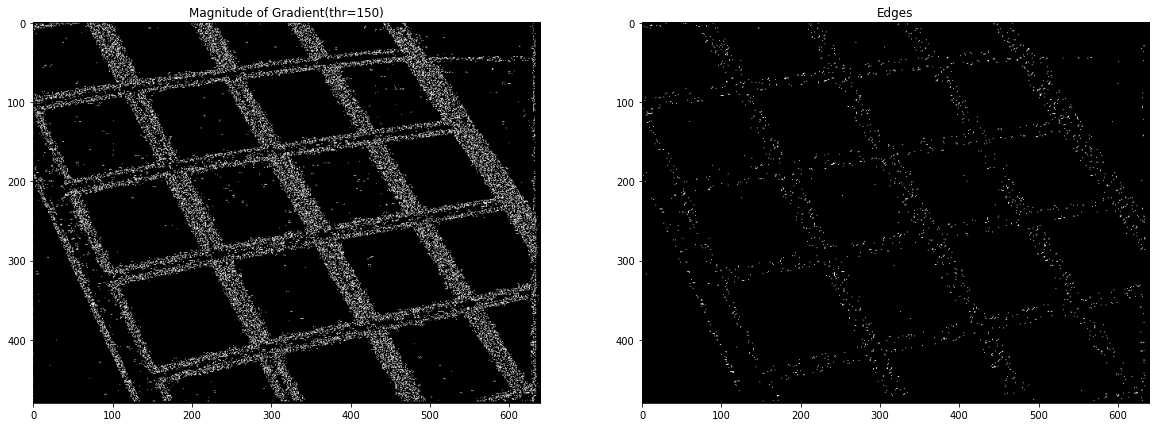

In [3]:
img = cv2.imread('edge_q.jpg',cv2.IMREAD_COLOR)
img0 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
sigma=5
myEdgeFilter(img0, sigma)